<a href="https://colab.research.google.com/github/RUDHRAMURTHI/My-codes/blob/master/Mother's_day_Hakathon_6_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import nltk
import os
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
import re

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.listdir()

['.config', 'test.csv', 'train.csv', 'sample_data']

In [4]:
os.getcwd()

'/content'

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
data_train = pd.read_csv("train.csv")

In [7]:
data_train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [8]:
data_train.original_text[101]

'Happy Mother’s Day to a Super Mum, from your Superhero Son @capamerica4hire hope you have the best day! #HappyMothersDay #MothersDay #SuperMum #IAmCaptainAmericaForHire #CaptainAmerica #Smiles #Love #Family #MyMum #Mother #Son #LuckyBoy pic.twitter.com/c369vciCLi'

In [9]:
data_train[["original_text","original_author"]].head()

,original_text,original_author
0,Happy #MothersDay to all you amazing mothers o...,BeenXXPired
1,Happy Mothers Day Mum - I'm sorry I can't be t...,FestiveFeeling
2,Happy mothers day To all This doing a mothers ...,KrisAllenSak
3,Happy mothers day to this beautiful woman...ro...,Queenuchee
4,Remembering the 3 most amazing ladies who made...,brittan17446794


In [10]:
data_train.original_text[0]

"Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of our society. #BeatCoronaVirus pic.twitter.com/va4nFjFQ5B"

In [11]:
re.sub(r'pic.twitter.com/[\w]*',"", data_train.original_text[0])

"Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of our society. #BeatCoronaVirus "

#### Analysing sentiment distribution

In [12]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


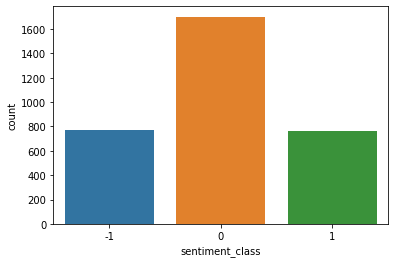

In [13]:
sns.countplot(x="sentiment_class",data=data_train)

In [14]:
data_train.shape

(3235, 6)

#### Handling Twitter picture Urls

In [0]:
import re
def cleaning_PicURL (text):
    text = re.sub(r'pic.twitter.com/[\w]*',"", text)
    return text

In [0]:
data_train["original_text"] = data_train["original_text"].apply(lambda x: cleaning_PicURL(x))

In [17]:
re.sub(r'pic.twitter.com/[\w]*',"", "test pic.twitter.com/va4nFjFQ5B")

'test '

In [18]:
data_train.original_text[0]

"Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of our society. #BeatCoronaVirus "

In [19]:
text =data_train.original_text[123]
text

"Happy Mother's day to all the Mum's out there today! It is a very different Mother's day but nothing will change how much we love you. #mothersday #love #life #mum #mummy #lovemum #aberdeenphotographer … https://www. instagram.com/p/B-CvqP3H10R/ ?igshid=1chcw74wpkk2z …"

In [20]:
re.sub(r"https?://[A-Za-z0-9./\W\s]*","", text)

"Happy Mother's day to all the Mum's out there today! It is a very different Mother's day but nothing will change how much we love you. #mothersday #love #life #mum #mummy #lovemum #aberdeenphotographer … "

In [21]:
data_train.original_text[101]

'Happy Mother’s Day to a Super Mum, from your Superhero Son @capamerica4hire hope you have the best day! #HappyMothersDay #MothersDay #SuperMum #IAmCaptainAmericaForHire #CaptainAmerica #Smiles #Love #Family #MyMum #Mother #Son #LuckyBoy '

In [22]:
data_train.original_text[684]

'#CoronavirusOutbreak #CancelLabourLeaderElection #StayHomeSaveLives #lockdownUKnow #covid19uk #ToryShambles #BorisJohnsonShouldNotBePM #BorisResign On a happier note, happy mothers day to all the amazing mothers out there.'

### removing Emojis

In [23]:
pip install emoji

     |████████████████████████████████| 51kB 7.6MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=79bbdc49c2624ff406f22d789501f33fad3967f0d83df99e3c6426d753205ffa
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
import emoji
def give_emoji_free_text(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

In [0]:
data_train["original_text"] = data_train["original_text"].apply(lambda x: give_emoji_free_text(x))

### Translating every tweet to english

In [26]:
pip install googletrans

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=6edd21d8c8c9dd867aa3f04a36954c4e0db525ed9a23d2d5236dbae5eec636b0
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [0]:
import googletrans
from googletrans import Translator
translator = Translator()

In [28]:
text = data_train.original_text[683]
text

"كل عام وجميع أمهات العالم بخير Happy Mother's day . #يوم_الام #عيد_الام #أمي #يوم #الام #يوم_الام_العالمي #امي #جنتي #سعادتي #ماما #الأم #يوم_الأم #عيد_الأم #mothersday #happymothersday #motherday #mom #mommy #happymom #motherhood #al_graphy #media #graphic"

In [29]:
translator.translate(text,dest="en").text

"Every year all the mothers of the world's fine Happy Mother's day. # # Aom_alam Aid_alam Mom # # # Mother Day # # Aom_alam_alaalmi Mom # # Jannati happiness # # Mama Mother # # Aom_alom Aid_alom #mothersday #happymothersday #motherday #mom #mommy #happymom #motherhood #al_graphy #media #graphic"

In [30]:
text = data_train.original_text[258]
text

'Our Mothers are rare gems and need to be celebrated not just today but everyday. Happy #MothersDay from all of us at Mediqués Plus by Meadowhall hospital.'

In [31]:
translator.translate(text).text

'Our Mothers are rare gems and need to be celebrated not just today but everyday. Happy #MothersDay from all of us at Mediqués Plus by Meadowhall hospital.'

In [32]:
'''
def my_translate(x):
    translator = googletrans.Translator()
    try:
        x = translator.translate(x).text
    except Exception as e:
        print(str(e))
    return(x)
'''

'\ndef my_translate(x):\n    translator = googletrans.Translator()\n    try:\n        x = translator.translate(x).text\n    except Exception as e:\n        print(str(e))\n    return(x)\n'

In [0]:
#Trans = data_train["original_text"].apply(lambda x: my_translate(x))
#Trans.head()


##### Removing XML components if any

In [0]:
def remove_XML(text):
    soup = BeautifulSoup(text, 'lxml')
    html_free = soup.get_text()
    return html_free

In [0]:
data_train["original_text"] = data_train["original_text"].apply(lambda x: remove_XML(x))

In [36]:
data_train.original_text[20]

"The hands that always lift's me when i fall. The person that always supports me for every second of my life. My Queen my everything my mother. HAPPY MOTHERS DAY"

#### Cleaning the text

In [0]:
def cleaning_text (text):
    text = re.sub(r"RT @[\w]*:","", text) #Removing retweet
    text = re.sub(r"@[\w]*","", text) #remove twitter handles (@xxx)
    text = re.sub(r"https?://[A-Za-z0-9./\W\s]*","", text)
    text = re.sub(r"https?://[A-Za-z0-9./]*","", text) #Removing https
    text = re.sub(r"\s+[a-zA-Z]\s+"," ", text) #space followed by alphabet, followed by space
    text = re.sub(r"#[\w]*","", text) # Removes hastag names
    text = re.sub(r"\d","", text) # remove numbers
    text = re.sub(r"[!|:|&|;|#|(|)]","", text) # removing special characters
    text = "".join([c for c in text if c not in string.punctuation]) #Remove punctuation
    text = re.sub(r"[^\x00-\x7F]+","", text) # removing non-ascii characters
    text = text.lower() # Converting the texts to lower case
    return text

In [0]:
data_train["original_text"] = data_train["original_text"].apply(lambda x: cleaning_text(x))

In [39]:
data_train.original_text[0]

'happy  to all you amazing mothers out there know its hard not being able to see your mothers today but its on all of us to do what we can to protect the most vulnerable members of our society '

In [40]:
data_train.original_text[123]

'happy mothers day to all the mums out there today it is very different mothers day but nothing will change how much we love you         '

In [41]:
data_train.original_text[74]

'happy mothers day to this beautiful woman aka my wife couldnt have asked for better woman to have kids with thank you for being so incredible all the time they appreciate you and so do i   '

### Tokenizing the tweets

In [42]:
data_train.original_text.head()

0    happy  to all you amazing mothers out there kn...
1    happy mothers day mum  im sorry cant be there ...
2    happy mothers day to all this doing mothers da...
3    happy mothers day to this beautiful womanroyal...
4    remembering the  most amazing ladies who made ...
Name: original_text, dtype: object

In [0]:
from nltk import word_tokenize

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
data_train["original_text"] = data_train["original_text"].apply(lambda x: word_tokenize(x))

In [46]:
data_train["original_text"].head(10)

0    [happy, to, all, you, amazing, mothers, out, t...
1    [happy, mothers, day, mum, im, sorry, cant, be...
2    [happy, mothers, day, to, all, this, doing, mo...
3    [happy, mothers, day, to, this, beautiful, wom...
4    [remembering, the, most, amazing, ladies, who,...
5    [happy, mothers, day, bratz, world, familiez, ...
6    [happy, mothers, day, to, all, you, wonderful,...
7    [show, me, mother, of, two, as, sexy, as, rosi...
8    [to, all, the, mothers, grandmothers, aunts, s...
9    [to, all, the, mothers, around, the, world, ga...
Name: original_text, dtype: object

#### Removing Stopwords

In [0]:
def remove_stopwords(lis):
    words = [w for w in lis if w not in stopwords.words('english')]
    return words

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
data_train["original_text"] = data_train["original_text"].apply(lambda x: remove_stopwords(x))

In [50]:
data_train["original_text"].head(10)

0    [happy, amazing, mothers, know, hard, able, se...
1    [happy, mothers, day, mum, im, sorry, cant, br...
2    [happy, mothers, day, mothers, days, work, tod...
3    [happy, mothers, day, beautiful, womanroyalty,...
4    [remembering, amazing, ladies, made, late, gra...
5    [happy, mothers, day, bratz, world, familiez, ...
6    [happy, mothers, day, wonderful, mums, cakecraft]
7    [show, mother, two, sexy, rosie, happy, mother...
8    [mothers, grandmothers, aunts, sisters, women,...
9    [mothers, around, world, gas, health, initiati...
Name: original_text, dtype: object

#### Steming the the words

In [0]:
from nltk.stem.snowball import SnowballStemmer

In [0]:
stemmer = SnowballStemmer('english')

In [0]:
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return(stem_text)

In [0]:
data_train["original_text"] = data_train["original_text"].apply(lambda x: word_stemmer(x))

In [55]:
data_train["original_text"].head(10)

0    happi amaz mother know hard abl see mother tod...
1    happi mother day mum im sorri cant bring mothe...
2    happi mother day mother day work today quiet t...
3    happi mother day beauti womanroyalti sooth mum...
4    rememb amaz ladi made late grandmoth iri mum c...
5    happi mother day bratz world familiez yasmin m...
6                happi mother day wonder mum cakecraft
7    show mother two sexi rosi happi mother day bea...
8    mother grandmoth aunt sister women live care l...
9    mother around world gas health initi wish happ...
Name: original_text, dtype: object

## Transforming the test data

In [56]:
os.listdir()

['.config', 'test.csv', 'train.csv', 'sample_data']

In [0]:
data_test = pd.read_csv("test.csv")

In [58]:
data_test.shape

(1387, 5)

In [59]:
data_test.head()

,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [0]:
data_test["original_text"] = data_test["original_text"].apply(lambda x: cleaning_PicURL(x))

In [0]:
data_test["original_text"] = data_test["original_text"].apply(lambda x: give_emoji_free_text(x))

In [0]:
data_test["original_text"] = data_test["original_text"].apply(lambda x: remove_XML(x))

In [0]:
data_test["original_text"] = data_test["original_text"].apply(lambda x: cleaning_text(x))

In [64]:
data_test["original_text"].head()

0     yeah once cooked potatoes when was  years old...
1    happy mothers day to all the mums stepmums gra...
2    i love the people from the uk however when awo...
3    happy st birthday happy mothers day to my mum ...
4    happy mothers day to all those wonderful mothe...
Name: original_text, dtype: object

In [0]:
data_test["original_text"] = data_test["original_text"].apply(lambda x: word_tokenize(x))

In [66]:
data_test["original_text"].head()

0    [yeah, once, cooked, potatoes, when, was, year...
1    [happy, mothers, day, to, all, the, mums, step...
2    [i, love, the, people, from, the, uk, however,...
3    [happy, st, birthday, happy, mothers, day, to,...
4    [happy, mothers, day, to, all, those, wonderfu...
Name: original_text, dtype: object

In [0]:
data_test["original_text"] = data_test["original_text"].apply(lambda x: remove_stopwords(x))

In [68]:
data_test["original_text"].head(10)

0    [yeah, cooked, potatoes, years, old, mean, thr...
1    [happy, mothers, day, mums, stepmums, grandmot...
2    [love, people, uk, however, awoke, saw, trendi...
3    [happy, st, birthday, happy, mothers, day, mum...
4    [happy, mothers, day, wonderful, mothers, worl...
5    [happy, mothers, day, thanks, support, mother,...
6    [happy, sunday, ruth, happy, mothers, day, lov...
7    [happy, mothers, day, amazing, mom, care, love...
8    [happy, mothers, day, mum, many, could, visit,...
9    [happy, mothering, sunday, afternoon, bed, new...
Name: original_text, dtype: object

In [0]:
data_test["original_text"] = data_test["original_text"].apply(lambda x: word_stemmer(x))

In [70]:
data_test["original_text"].head(10)

0    yeah cook potato year old mean threw bag spud ...
1    happi mother day mum stepmum grandmoth dad cov...
2    love peopl uk howev awok saw trend woke americ...
3    happi st birthday happi mother day mum cant se...
4    happi mother day wonder mother world live pres...
5    happi mother day thank support mother daughter...
6    happi sunday ruth happi mother day love peac b...
7    happi mother day amaz mom care love children m...
8    happi mother day mum mani could visit phone so...
9    happi mother sunday afternoon bed new book tak...
Name: original_text, dtype: object

### Converting text data to numbers

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

In [0]:
tfidf_Transformer = TfidfVectorizer()

In [0]:
X_train = tfidf_Transformer.fit_transform(data_train["original_text"])

In [74]:
y_train = data_train["sentiment_class"]
y_train.head()

0    0
1    0
2   -1
3    0
4   -1
Name: sentiment_class, dtype: int64

In [0]:
X_test = tfidf_Transformer.transform(data_test["original_text"])

In [76]:
X_train.shape

(3235, 5788)

In [77]:
X_test.shape

(1387, 5788)

In [78]:
y_train.shape

(3235,)

## Building Modal

In [0]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### SVC

In [0]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

In [0]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, scoring='f1_weighted')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   2.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   2.4s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   4.6s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   2.5s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   2.3s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   2.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   1.8s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   2.4s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   2.4s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   2.4s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   2.4s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   2.4s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   2.3s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   2.4s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .

[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   4.4s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   4.2s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   3.8s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   3.5s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   4.2s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   3.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   3.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

[CV] ................... C=10, gamma=0.001, kernel=poly, total=   1.9s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   1.7s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   2.4s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   2.6s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   2.4s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   2.3s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   2.3s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[CV] ................... C=100, gamma=0.01, kernel=poly, total=   1.7s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   1.8s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   1.7s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   1.7s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   2.5s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   2.4s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   2.5s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 13.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=2)

In [0]:
grid.best_score_

0.4162840484174154

In [0]:
pd.DataFrame(grid.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.1,linear,0.362401
1,0.1,rbf,0.362401
2,0.1,poly,0.362401
3,0.1,sigmoid,0.362401
4,0.1,linear,0.362401
5,0.1,rbf,0.362401
6,0.1,poly,0.362401
7,0.1,sigmoid,0.362401
8,0.1,linear,0.362401
9,0.1,rbf,0.362401


In [0]:
stsvc= pd.DataFrame(grid.cv_results_)[['params','mean_test_score']]
stsvc

,params,mean_test_score
0,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.362401
1,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.362401
2,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.362401
3,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.362401
4,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.362401
5,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.362401
6,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.362401
7,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.362401
8,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.362401
9,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.362401


In [0]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [0]:
pred = grid.best_estimator_.predict(X_test)

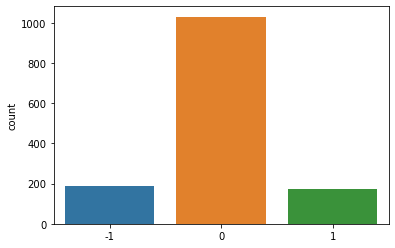

In [0]:
sns.countplot(pred)

In [0]:
#from sklearn.pipeline import Pipeline

In [0]:
'''
svm_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()), 
                     ('clf-svm', SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),])
'''

In [0]:
#svm_clf = svm_clf.fit(data_train["original_text"], data_train["sentiment_class"])

In [0]:
#pred = svm_clf.predict(data_test["original_text"])

In [0]:
Submission1 = pd.DataFrame(data_test['id'])
Submission1["sentiment_class"] = pred
#Submission1.to_csv("Mothersday_Submission_svm3Grid.csv", index = False)

In [0]:
pred[0:30]

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,
       -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

### Nive bayes

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
clf = MultinomialNB().fit(X_train, y_train)

In [0]:
parameters = {'alpha':[1.0,0.01,0.001,10], 'fit_prior':[True,False]}

In [0]:
grid_NMB = GridSearchCV(MultinomialNB(),parameters, scoring='f1_weighted')
grid_NMB.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.01, 0.001, 10],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [0]:
grid_NMB.best_score_

0.4156174034385011

In [0]:
grid_NMB.best_estimator_

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [0]:
grid_NMB.best_params_

{'alpha': 0.01, 'fit_prior': True}

In [0]:
pred = grid_NMB.best_estimator_.predict(X_test)

In [0]:
Submission1 = pd.DataFrame(data_test['id'])
Submission1["sentiment_class"] = pred
Submission1.to_csv("Mothersday_Submission_nivemultinomial2_test.csv", index = False)

In [0]:
pred[1:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [0]:
grid_NMB.best_estimator_.predict_proba(X_test)

array([[0.19264352, 0.77061969, 0.03673679],
       [0.13803495, 0.67705018, 0.18491487],
       [0.15862471, 0.52757526, 0.31380002],
       ...,
       [0.02726906, 0.45122276, 0.52150818],
       [0.25410096, 0.49796556, 0.24793348],
       [0.39026416, 0.42607316, 0.18366268]])

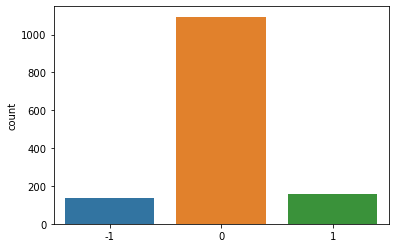

In [0]:
sns.countplot(pred)

#### SGDClassifier

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
parameters = {'alpha':[0.0001,1.0,0.01,0.001,10,0.003], 'penalty':['l1','l2','elasticnet'],
              'learning_rate':['constant','optimal','invscaling','adaptive'],'eta0':[0.1,0.2,0.3]}

In [0]:
grid_SGD = GridSearchCV(SGDClassifier(),parameters, scoring='f1_weighted')
grid_SGD.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 1.0, 0.01, 0.001, 10, 0.003],
                         'eta0': [0.1, 0.2, 0.3],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
   

In [0]:
grid_SGD.best_score_

0.41736077231248664

In [0]:
grid_SGD.best_params_

{'alpha': 0.0001, 'eta0': 0.3, 'learning_rate': 'adaptive', 'penalty': 'l1'}

In [0]:
grid_SGD.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
pred = grid_SGD.best_estimator_.predict(X_test)

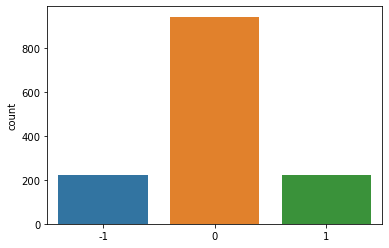

In [0]:
sns.countplot(pred)

In [0]:
Submission1 = pd.DataFrame(data_test['id'])
Submission1["sentiment_class"] = pred
#Submission1.to_csv("Mothersday_Submission_SGDClassifier2.csv", index = False)

### Tpot Classifier

In [0]:
from tpot import TPOTClassifier

In [0]:
X_train.shape

(3235, 5788)

In [0]:
y_train.shape

(3235,)

In [0]:
X_test.shape

(1387, 5788)

In [0]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, 
                      random_state=200,scoring='f1_weighted',config_dict='TPOT sparse')
tpot.fit(X_train, y_train)



Generation 1 - Current best internal CV score: 0.4224032401859053
Generation 2 - Current best internal CV score: 0.4224032401859053
Generation 3 - Current best internal CV score: 0.4224032401859053
Generation 4 - Current best internal CV score: 0.4224032401859053
Generation 5 - Current best internal CV score: 0.4224032401859053
Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.8500000000000001, min_samples_leaf=6, min_samples_split=17, n_estimators=100)


NameError: name 'y_test' is not defined

In [0]:
tpot.export('tpot_advertise_pipeline.py')

In [0]:
tpot.cv

5

In [0]:
tpot.fitted_pipeline_

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None,
                                        max_features=0.8500000000000001,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=6,
                                        min_samples_split=17,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=200,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [0]:
pred = tpot.predict(X_test)

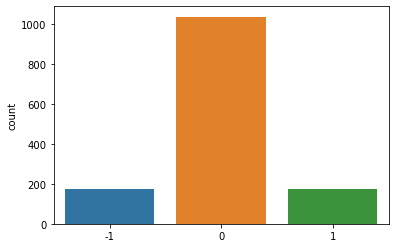

In [0]:
sns.countplot(pred)

In [0]:
Submission1 = pd.DataFrame(data_test['id'])
Submission1["sentiment_class"] = pred
#Submission1.to_csv("Mothersday_Submission_tpotRandomForest.csv", index = False)

### CNN

In [80]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
import tensorflow as tf
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D
from keras.layers import LSTM, SimpleRNN
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


#### Preprocessing

In [81]:
X_train= data_train["original_text"].values
X_train

array(['happi amaz mother know hard abl see mother today us protect vulner member societi',
       'happi mother day mum im sorri cant bring mother day flower cwtch honest point id walk hot coal abl ill bell soon love lot xxx ps need photo',
       'happi mother day mother day work today quiet time reflect dog walk finish jigsaw garden learn guitar chord drunk strawberri gin tonic watch lee even dvd favourit place visit',
       ...,
       'happi mother day craziest woman know thank alway push best person',
       'happi mother day amaz wife love like crazi even though your bit weird xxx',
       'wish safe happi mother day ferri inn'], dtype=object)

In [82]:
X_test= data_test["original_text"].values
X_test

array(['yeah cook potato year old mean threw bag spud toilet happi mother day made breakfast time thought cool draw nake ladi dachshund overhead projector psycholog class',
       'happi mother day mum stepmum grandmoth dad cover parent role',
       'love peopl uk howev awok saw trend woke american immedi happi mother day mum across way god bless love share sacrific make',
       ...,
       'despit bullshit today one favourit day lonnng time danc donut took photo drive daphn chines quiz happi mother day',
       'happi mother day first queen danielesullivan also wish special ladi wonder mother day',
       'mother day walk live tini villag rural lincolnshir walk mile without see soul happi mother day amaz women know'],
      dtype=object)

In [0]:
y_train = pd.get_dummies(data_train["sentiment_class"])

In [84]:
y_train.shape

(3235, 3)

In [85]:
y_train.head()

,-1,0,1
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [87]:
len(tokenizer.word_index)

5802

In [88]:
X_train[2190]

[50,
 102,
 2,
 1643,
 1092,
 4,
 3,
 1,
 2,
 20,
 4,
 14,
 8,
 23,
 54,
 224,
 326,
 262,
 29,
 47,
 56,
 443,
 437,
 50,
 18,
 640,
 26]

In [0]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 1500

In [0]:


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [91]:
X_train.shape

(3235, 1500)

In [92]:
X_test.shape

(1387, 1500)

### Model

In [0]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 5000, input_length=maxlen , trainable=False)
#embedding_layer = Embedding(5802, 5000, input_length=5788 , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(64, 5, activation='relu'))
model.add(Conv1D(128, 5, activation='relu', kernel_regularizer="l2"))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))

In [0]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [195]:
model.fit(X_train,y_train, batch_size= 64, epochs=7, validation_split=0.2)

Train on 2588 samples, validate on 647 samples
Epoch 1/7
2588/2588 [==============================] - 14s 6ms/step - loss: 1.5427 - accuracy: 0.5240 - val_loss: 1.2922 - val_accuracy: 0.5162
Epoch 2/7
2588/2588 [==============================] - 14s 5ms/step - loss: 1.1889 - accuracy: 0.5282 - val_loss: 1.1394 - val_accuracy: 0.5162
Epoch 3/7
2588/2588 [==============================] - 14s 5ms/step - loss: 1.0702 - accuracy: 0.5286 - val_loss: 1.1077 - val_accuracy: 0.5147
Epoch 4/7
2588/2588 [==============================] - 14s 6ms/step - loss: 0.9174 - accuracy: 0.6179 - val_loss: 1.3734 - val_accuracy: 0.5116
Epoch 5/7
2588/2588 [==============================] - 14s 6ms/step - loss: 0.6236 - accuracy: 0.7902 - val_loss: 1.6720 - val_accuracy: 0.4621
Epoch 6/7
2588/2588 [==============================] - 14s 6ms/step - loss: 0.4328 - accuracy: 0.8740 - val_loss: 1.8287 - val_accuracy: 0.4513
Epoch 7/7
2588/2588 [==============================] - 14s 6ms/step - loss: 0.3001 - accu

In [0]:
pred_prob = model.predict(X_test)

In [197]:
pred_prob

array([[1.6554724e-01, 7.5963891e-01, 7.4813820e-02],
       [2.5363027e-03, 9.6762532e-01, 2.9838424e-02],
       [1.1879048e-01, 8.7684584e-01, 4.3636519e-03],
       ...,
       [5.2381412e-04, 2.5989968e-01, 7.3957652e-01],
       [4.2851624e-04, 7.1723938e-02, 9.2784750e-01],
       [2.5425889e-02, 8.3090907e-01, 1.4366505e-01]], dtype=float32)

In [198]:
Class_names=[-1,0,1]
Class_names[np.argmax(pred_prob[0])]

0

In [0]:
Class_names=[-1,0,1]
pred =[]
for lis in pred_prob:
    clas = Class_names[np.argmax(lis)]
    pred.append(clas)

In [200]:
pred[0:20]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, -1]

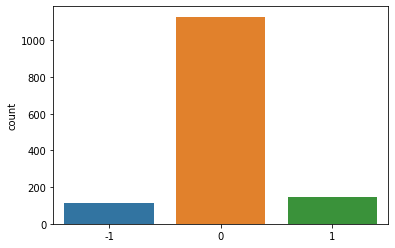

In [201]:
sns.countplot(pred)

In [0]:
Submission1 = pd.DataFrame(data_test['id'])
Submission1["sentiment_class"] = pred
Submission1.to_csv("Mothersday_Submission_ThreeconvolutionNN10.csv", index = False)

## LSTM

In [0]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 5000, input_length=maxlen , trainable=False)
#embedding_layer = Embedding(5802, 5000, input_length=5788 , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128,activation='relu'))
model.add(Dense(3, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [273]:
model.fit(X_train,y_train, batch_size= 64, epochs=5, validation_split=0.2)

Train on 2588 samples, validate on 647 samples
Epoch 1/5


ResourceExhaustedError: ignored

In [0]:
pred_prob = model.predict(X_test)

In [226]:
pred_prob

array([[0.26032433, 0.48556975, 0.25410596],
       [0.26032433, 0.48556975, 0.25410596],
       [0.26032433, 0.48556975, 0.25410596],
       ...,
       [0.26032433, 0.48556975, 0.25410596],
       [0.26032433, 0.48556975, 0.25410596],
       [0.26032433, 0.48556975, 0.25410596]], dtype=float32)

In [227]:
Class_names=[-1,0,1]
Class_names[np.argmax(pred_prob[0])]

0

In [0]:
Class_names=[-1,0,1]
pred =[]
for lis in pred_prob:
    clas = Class_names[np.argmax(lis)]
    pred.append(clas)

In [229]:
pred[1:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

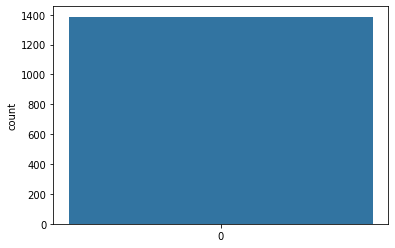

In [230]:
sns.countplot(pred)

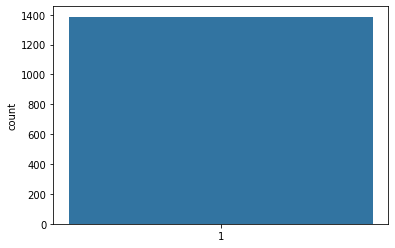

In [220]:
sns.countplot(model.predict_classes(X_test))

In [0]:
Submission1 = pd.DataFrame(data_test['id'])
Submission1["sentiment_class"] = pred
Submission1.to_csv("Mothersday_Submission_LSTMNN2.csv", index = False)

### RNN

In [0]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 5000, input_length=maxlen , trainable=False)
#embedding_layer = Embedding(5802, 5000, input_length=5788 , trainable=False)
model.add(embedding_layer)
model.add(SimpleRNN(128,activation='relu'))
model.add(Dense(3, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [473]:
model.fit(X_train,y_train, batch_size= 64, epochs=100, validation_split=0.2)

Train on 2588 samples, validate on 647 samples
Epoch 1/100
2588/2588 [==============================] - 40s 15ms/step - loss: 1.0362 - accuracy: 0.5193 - val_loss: 1.0360 - val_accuracy: 0.5162
Epoch 2/100
2588/2588 [==============================] - 39s 15ms/step - loss: 1.0248 - accuracy: 0.5282 - val_loss: 1.0287 - val_accuracy: 0.5162
Epoch 3/100
2588/2588 [==============================] - 39s 15ms/step - loss: 1.0225 - accuracy: 0.5282 - val_loss: 1.0282 - val_accuracy: 0.5162
Epoch 4/100
2588/2588 [==============================] - 39s 15ms/step - loss: 1.0235 - accuracy: 0.5282 - val_loss: 1.0386 - val_accuracy: 0.5162
Epoch 5/100
2588/2588 [==============================] - 39s 15ms/step - loss: 1.0251 - accuracy: 0.5282 - val_loss: 1.0367 - val_accuracy: 0.5162
Epoch 6/100
2588/2588 [==============================] - 39s 15ms/step - loss: 1.0228 - accuracy: 0.5282 - val_loss: 1.0287 - val_accuracy: 0.5162
Epoch 7/100
2588/2588 [==============================] - 39s 15ms/step 

In [0]:
pred_prob = model.predict(X_test)

In [327]:
pred_prob

array([[0.27512178, 0.5285684 , 0.1963098 ],
       [0.27512178, 0.5285684 , 0.19630979],
       [0.27512178, 0.5285684 , 0.19630979],
       ...,
       [0.27512178, 0.5285684 , 0.19630979],
       [0.27512178, 0.5285684 , 0.1963098 ],
       [0.27512178, 0.5285684 , 0.19630979]], dtype=float32)

In [328]:
Class_names=[-1,0,1]
Class_names[np.argmax(pred_prob[0])]

0

In [0]:
Class_names=[-1,0,1]
pred =[]
for lis in pred_prob:
    clas = Class_names[np.argmax(lis)]
    pred.append(clas)

In [330]:
pred[1:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

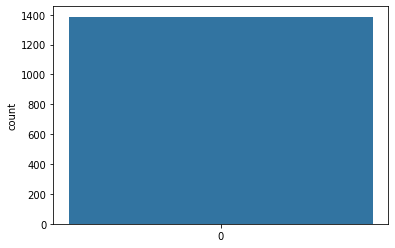

In [331]:
sns.countplot(pred)

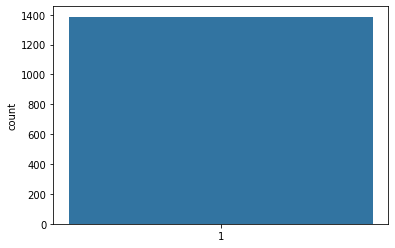

In [332]:
sns.countplot(model.predict_classes(X_test))

In [0]:
Submission1 = pd.DataFrame(data_test['id'])
Submission1["sentiment_class"] = pred
Submission1.to_csv("Mothersday_Submission_RNN2.csv", index = False)